In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [63]:
actions = ['left', 'right']
# states are from 0 to 6.

def take_step(state, action):
    if (action == 'left'):
        new_state = state - 1
    elif (action == 'right'):
        new_state = state + 1
    if (new_state == 6):
        reward = 1
    else:
        reward = 0
    return new_state, reward
    
def check_terminal(state):
    if (state == 0 or state == 6):
        return True
    else:
        return False

def find_rmse(value_function):
    true_value = np.asarray([1./6, 2./6, 3./6, 4./6, 5./6])
    value = value_function[1:6]
    diff = true_value - value
    error = np.sum(np.square(diff)) / 5
    return math.sqrt(error)

In [54]:
def td0(num_episodes, alpha):
    
    v_pi = np.zeros((7))
    v_pi[1:6] = 0.5
    
    rmse = []
    
    for i in range(num_episodes):
        current_state = 3
    
        while (not check_terminal(current_state)):
            action = random.choice(actions)
            new_state, reward = take_step(current_state, action)
            v_pi[current_state] += alpha * (reward + v_pi[new_state] - v_pi[current_state])
            current_state = new_state
        
        rmse.append(find_rmse(v_pi))
    
    return v_pi, rmse  

In [67]:
def monte_carlo(num_episodes, alpha):
    
    v_pi = np.zeros((7))
    v_pi[1:6] = 0.5
    
    rmse = []
    
    for i in range(num_episodes):
        stored_sequence = []
        current_state = 3
    
        while (not check_terminal(current_state)):
            action = random.choice(acticons)
            new_state, reward = take_step(current_state, action)
            stored_sequence.append([current_state, action, new_state, reward])
            current_state = new_state
        
        return_g = 0
        for j in range(len(stored_sequence)-1, -1, -1):
            return_g += stored_sequence[j][-1]
            v_pi[stored_sequence[j][0]] += alpha * (return_g - v_pi[stored_sequence[j][0]])
            
        rmse.append(find_rmse(v_pi))
            
    return v_pi, rmse

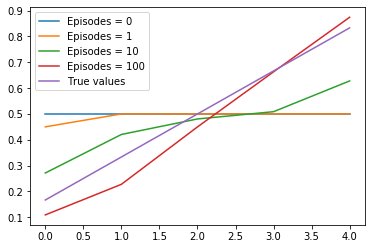

In [50]:
episodes = [0, 1, 10, 100]
for ep in episodes:
    value_functions, rmse = td0(ep, 0.1)
    plt.plot(value_functions[1:6], label = 'Episodes = ' + str(ep))
plt.plot([1./6, 2./6, 3./6, 4./6, 5./6], label = 'True values')
plt.legend(loc='upper left')    
plt.show()

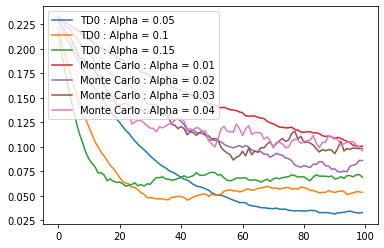

In [68]:
alphas_td = [0.05, 0.1, 0.15]
alphas_mc = [0.01, 0.02, 0.03, 0.04]
runs = 50

for i in alphas_td:
    rmse_avg = []
    for j in range(runs):
        value_functions, rmse_td = td0(100, i)
        rmse_avg.append(rmse_td)
    rmse_avg = np.asarray(rmse_avg)
    rmse_averaged = np.sum(rmse_avg, axis=0) / runs
    plt.plot(rmse_averaged, label= 'TD0 : Alpha = ' + str(i))

for i in alphas_mc:
    rmse_avg = []
    for j in range(runs):
        value_functions, rmse_mc = monte_carlo(100, i)
        rmse_avg.append(rmse_mc)
    rmse_avg = np.asarray(rmse_avg)
    rmse_averaged = np.sum(rmse_avg, axis=0) / runs
    plt.plot(rmse_averaged, label= 'Monte Carlo : Alpha = ' + str(i))    
    
plt.legend(loc='upper left')    
plt.show()